In [1]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd

import utide

In [2]:
df = pd.read_csv("./0020BLPP02_datetime_waterlevel.txt")
df["datetime"] = pd.to_datetime(df["datetime"], dayfirst=True)
df["type"] = ["source"] * len(df.index)
df.sort_values(by="datetime", inplace=True)
df

,datetime,water level,type
0,2020-11-01 00:00:00,228,source
1,2020-11-01 01:00:00,177,source
2,2020-11-01 02:00:00,115,source
3,2020-11-01 03:00:00,70,source
4,2020-11-01 04:00:00,60,source
...,...,...,...
548,2020-11-23 20:00:00,180,source
549,2020-11-23 21:00:00,167,source
550,2020-11-23 22:00:00,158,source
551,2020-11-23 23:00:00,155,source


<AxesSubplot:xlabel='datetime'>

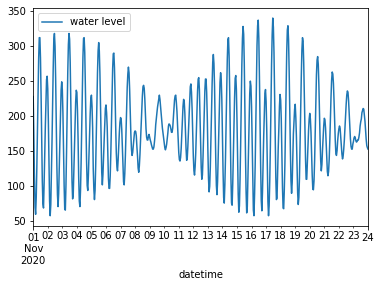

In [3]:
df.plot(x="datetime", y="water level")

In [4]:
time = mdates.date2num(df.datetime)
coef = utide.solve(time, df["water level"].to_numpy(),
                   lat=-25,                    
                   method='ols',
                   conf_int='MC')

solve: matrix prep ... solution ... done.


In [45]:
coef

{'name': array(['M2', 'S2', 'K1', 'O1', 'MS4', 'M4', 'MSF', 'M3', 'S4', '2MK5',
        'SK3', '2SK5', '3MK7', 'M6', '2MS6', '2SM6', 'M8'], dtype=object),
 'aux': {'frq': array([0.0805114 , 0.08333333, 0.04178075, 0.03873065, 0.16384473,
         0.1610228 , 0.00282193, 0.1207671 , 0.16666667, 0.20280355,
         0.12511408, 0.20844741, 0.28331495, 0.2415342 , 0.24435613,
         0.24717807, 0.3220456 ]),
  'lind': array([ 47,  56,  20,  12,  85,  81,   5,  68,  88,  95,  73,  98, 119,
         105, 109, 112, 124]),
  'reftime': 18578.5,
  'opt': {'twodim': False,
   'equi': True,
   'conf_int': True,
   'cnstit': 'auto',
   'notrend': False,
   'prefilt': [],
   'nodsatlint': 0,
   'nodsatnone': 0,
   'gwchlint': False,
   'gwchnone': False,
   'infer': None,
   'inferaprx': 0,
   'rmin': 1,
   'method': 'ols',
   'tunrdn': 1,
   'linci': False,
   'white': False,
   'nrlzn': 200,
   'lsfrqosmp': 1,
   'nodiagn': 0,
   'diagnplots': 0,
   'diagnminsnr': 2,
   'ordercnstit': 'PE',
  

In [43]:
time

array([18567.        , 18567.04166667, 18567.08333333, 18567.125     ,
       18567.16666667, 18567.20833333, 18567.25      , 18567.29166667,
       18567.33333333, 18567.375     , 18567.41666667, 18567.45833333,
       18567.5       , 18567.54166667, 18567.58333333, 18567.625     ,
       18567.66666667, 18567.70833333, 18567.75      , 18567.79166667,
       18567.83333333, 18567.875     , 18567.91666667, 18567.95833333,
       18568.        , 18568.04166667, 18568.08333333, 18568.125     ,
       18568.16666667, 18568.20833333, 18568.25      , 18568.29166667,
       18568.33333333, 18568.375     , 18568.41666667, 18568.45833333,
       18568.5       , 18568.54166667, 18568.58333333, 18568.625     ,
       18568.66666667, 18568.70833333, 18568.75      , 18568.79166667,
       18568.83333333, 18568.875     , 18568.91666667, 18568.95833333,
       18569.        , 18569.04166667, 18569.08333333, 18569.125     ,
       18569.16666667, 18569.20833333, 18569.25      , 18569.29166667,
      

In [38]:
print(coef.keys())

dict_keys(['name', 'aux', 'nR', 'nNR', 'nI', 'weights', 'A', 'g', 'mean', 'slope', 'g_ci', 'A_ci', 'diagn', 'PE', 'SNR'])


In [40]:
tide = utide.reconstruct(time, coef)

prep/calcs ... done.


In [41]:
print(tide.keys())

dict_keys(['t_in', 'epoch', 'constit', 'min_SNR', 'min_PE', 't_mpl', 'h'])


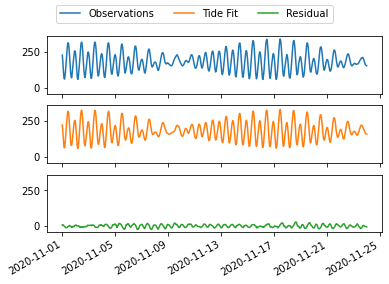

In [42]:
t = tide.t_mpl

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True)

ax0.plot(t, df["water level"], label=u'Observations', color='C0')
ax1.plot(t, tide.h, label=u'Tide Fit', color='C1')
ax2.plot(t, df["water level"] - tide.h, label=u'Residual', color='C2')
ax2.xaxis_date()
fig.legend(ncol=3, loc='upper center')
fig.autofmt_xdate()